# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Weather check in each city in cities
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
count = 1

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_new = []


print("Beginning data retrieval")
print("--------------------------------")
for city in cities:
        
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_new.append(response['name'])
        
        print(f"Processing record {count}| {city}")
        count += 1
    except:
        print("City not found, skipping to next")
        
print("------------Data retrieval completed----------------")

Beginning data retrieval
--------------------------------
City not found, skipping to next
City not found, skipping to next
Processing record 1| biltine
Processing record 2| umea
Processing record 3| barrow
Processing record 4| songjianghe
Processing record 5| kanniyakumari
Processing record 6| pijao
Processing record 7| east london
Processing record 8| albany
Processing record 9| punta arenas
Processing record 10| santa cruz
Processing record 11| pipri
Processing record 12| ushuaia
Processing record 13| vigia del fuerte
Processing record 14| norman wells
Processing record 15| busselton
City not found, skipping to next
Processing record 16| misratah
Processing record 17| klaksvik
Processing record 18| mnogovershinnyy
Processing record 19| atuona
Processing record 20| itarema
Processing record 21| butaritari
Processing record 22| lagoa
Processing record 23| narsaq
City not found, skipping to next
Processing record 24| omsukchan
Processing record 25| avarua
Processing record 26| bilma
Pr

Processing record 238| sobolevo
Processing record 239| lensk
Processing record 240| vardo
Processing record 241| bagdarin
Processing record 242| nikolskoye
Processing record 243| deputatskiy
Processing record 244| yeppoon
Processing record 245| mandan
Processing record 246| lugovoy
Processing record 247| pudozh
Processing record 248| kyaukse
Processing record 249| san patricio
Processing record 250| isla mujeres
Processing record 251| coos bay
Processing record 252| mount isa
Processing record 253| coquimbo
Processing record 254| grand gaube
Processing record 255| guerrero negro
Processing record 256| sai buri
Processing record 257| schkeuditz
Processing record 258| jinxi
City not found, skipping to next
Processing record 259| la ronge
Processing record 260| chuy
Processing record 261| ucluelet
Processing record 262| mahanoro
Processing record 263| merauke
Processing record 264| angoram
Processing record 265| provideniya
Processing record 266| cintalapa
Processing record 267| margate
P

Processing record 470| hukuntsi
Processing record 471| mankono
Processing record 472| kostomuksha
Processing record 473| alta floresta
Processing record 474| conceicao do araguaia
Processing record 475| bingol
Processing record 476| the pas
Processing record 477| sabha
City not found, skipping to next
Processing record 478| griffith
Processing record 479| tazmalt
City not found, skipping to next
Processing record 480| diapaga
Processing record 481| iberia
Processing record 482| san alberto
City not found, skipping to next
Processing record 483| korla
City not found, skipping to next
City not found, skipping to next
Processing record 484| stephenville crossing
Processing record 485| cockburn town
Processing record 486| miramar
Processing record 487| palana
Processing record 488| ternate
Processing record 489| road town
Processing record 490| rawson
Processing record 491| marlton
Processing record 492| karratha
Processing record 493| guarapari
Processing record 494| samana
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
my_dict = {"City":city_new,"Lat":lat,"Lon":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
          "Wind Speed":wind_speed,"Country":country,"Date":date}
city_df = pd.DataFrame(my_dict)
city_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Biltine,14.5333,20.9167,96.26,9,69,9.31,TD,1650735460
1,Umeå,63.8284,20.2597,42.73,52,0,6.91,SE,1650735460
2,Barrow,71.2906,-156.7887,15.82,86,100,4.61,US,1650734821
3,Songjianghe,42.1859,127.4790,52.86,27,47,9.78,CN,1650735461
4,Kanniyākumāri,8.0833,77.5667,82.99,78,93,5.17,IN,1650735461


In [15]:
city_df.to_csv(output_data_file)

In [34]:
city_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Biltine,14.5333,20.9167,96.26,9,69,9.31,TD,1650735460
1,Umeå,63.8284,20.2597,42.73,52,0,6.91,SE,1650735460
2,Barrow,71.2906,-156.7887,15.82,86,100,4.61,US,1650734821
3,Songjianghe,42.1859,127.4790,52.86,27,47,9.78,CN,1650735461
4,Kanniyākumāri,8.0833,77.5667,82.99,78,93,5.17,IN,1650735461
...,...,...,...,...,...,...,...,...,...
567,Qujing,25.4833,103.7833,59.99,80,34,6.49,CN,1650735595
568,Igrim,63.1906,64.4162,28.45,99,100,2.89,RU,1650735046
569,Salinas,36.6777,-121.6555,63.82,64,0,3.44,US,1650735596
570,Lebyazh'ye,55.2689,66.4947,33.03,47,6,6.82,RU,1650735596


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
too_humid = city_df.loc[city_df['Humidity'] > 100]
too_humid

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [36]:
#  Get the indices of cities that have humidity over 100%.
humid_indicies = too_humid.index
humid_indicies

Int64Index([], dtype='int64')

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean = city_df[city_df["City"].isin(too_humid) == False].reset_index(drop=True)
clean

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Biltine,14.5333,20.9167,96.26,9,69,9.31,TD,1650735460
1,Umeå,63.8284,20.2597,42.73,52,0,6.91,SE,1650735460
2,Barrow,71.2906,-156.7887,15.82,86,100,4.61,US,1650734821
3,Songjianghe,42.1859,127.4790,52.86,27,47,9.78,CN,1650735461
4,Kanniyākumāri,8.0833,77.5667,82.99,78,93,5.17,IN,1650735461
...,...,...,...,...,...,...,...,...,...
567,Qujing,25.4833,103.7833,59.99,80,34,6.49,CN,1650735595
568,Igrim,63.1906,64.4162,28.45,99,100,2.89,RU,1650735046
569,Salinas,36.6777,-121.6555,63.82,64,0,3.44,US,1650735596
570,Lebyazh'ye,55.2689,66.4947,33.03,47,6,6.82,RU,1650735596


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

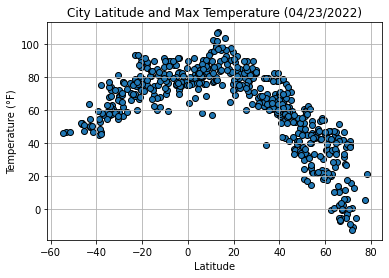

In [46]:
# Latitudes and temperatures
today = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.scatter(clean['Lat'],clean['Max Temp'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.grid()

## Latitude vs. Humidity Plot

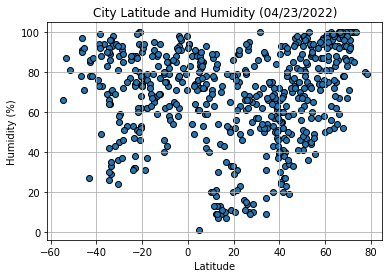

In [47]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Humidity'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

## Latitude vs. Cloudiness Plot

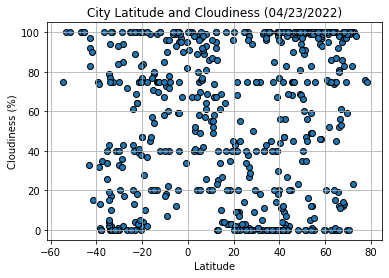

In [48]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Cloudiness'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

## Latitude vs. Wind Speed Plot

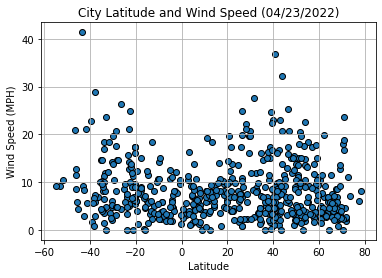

In [49]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Wind Speed'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()

## Linear Regression

In [52]:
north = clean.loc[clean['Lat'] >= 0]
south = clean.loc[clean['Lat'] < 0]

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,East London,-33.0153,27.9116,63.12,93,100,4.83,ZA,1650734960
8,Punta Arenas,-53.1500,-70.9167,46.42,87,100,9.22,CL,1650735265
9,Santa Cruz de la Sierra,-17.8000,-63.1667,87.85,62,75,14.97,BO,1650735173
11,Ushuaia,-54.8000,-68.3000,46.06,66,75,9.22,AR,1650735463
14,Busselton,-33.6500,115.3333,58.96,70,17,11.88,AU,1650735287
...,...,...,...,...,...,...,...,...,...
551,Rio Grande,-32.0350,-52.0986,71.71,43,0,12.08,BR,1650735591
554,Vilcún,-38.6500,-72.2333,54.34,73,74,5.68,CL,1650735592
559,Belmonte,-15.8631,-38.8828,83.64,67,77,7.16,BR,1650735593
562,Noumea,-22.2763,166.4572,77.00,99,64,13.76,NC,1650735594


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7321742245798243


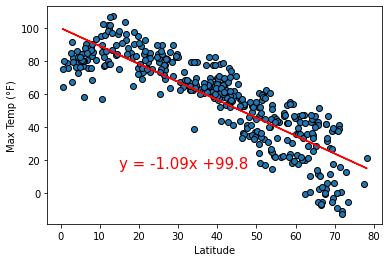

In [71]:
# Northern Hemisphere linear regression latitude/max temp
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,15),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5644129300395461


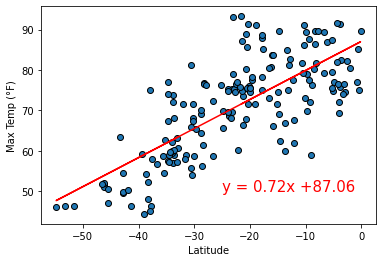

In [75]:
# Southern Hemisphere linear regression latitude/max temp
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-25,50),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1371333572757422


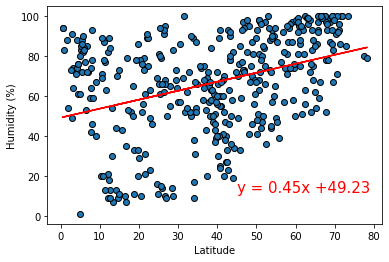

In [74]:
# Northern Hemisphere linear regression latitude/humidity
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,12),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0019699974580785176


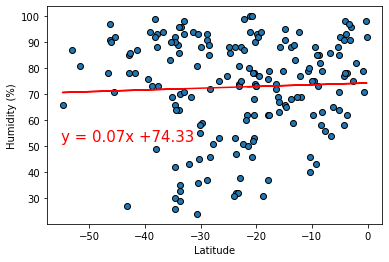

In [73]:
# Southern Hemisphere linear regression latitude/humidity
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-55,52),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03003696116109961


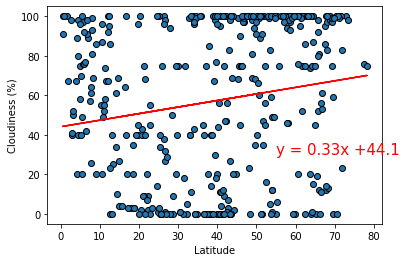

In [81]:
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(55,30),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.029580935142670642


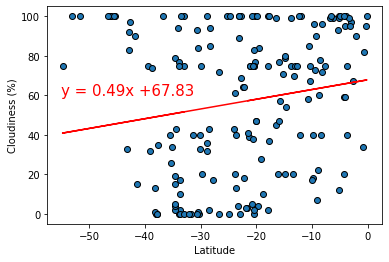

In [82]:
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-55,60),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005640542915315409


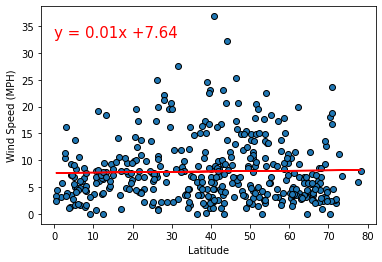

In [83]:
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,33),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07139817781371906


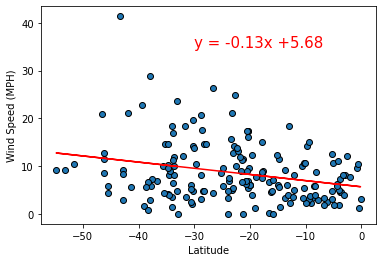

In [85]:
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-30,35),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue**2}")